In [1]:
import mlflow

/Users/eduardo.melo/Documents/lalo/github_repos/mlflow_pruebas/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# creamos experimento

In [14]:


experiment_id = mlflow.create_experiment(
    name="my_experiment3", 
    tags={
        "topic": "experimento_3",
        "version": "v1", 
        }
)

print(experiment_id)

# seteamos el experimento para hacer runs sobre él
experiment = mlflow.set_experiment(experiment_id=experiment_id) # or experiment_name (lo crea si no existe)

# creamos un run
with mlflow.start_run() as run:
    print('active run id:', run.info.run_id)

# obtenemos el experimento (obtjeto tipo Experiment)
print('experiment id:', experiment.experiment_id)
print('experiment name:', experiment.name)

print(experiment.to_proto())



# retrieving experiments

In [35]:
# retrieval de experimentos
print(mlflow.get_experiment_by_name('my_experiment3').to_proto()) # puede regresar none (get sólo es informativo), también puede ser por ID

experiment_id: "3"
name: "my_experiment3"
artifact_location: "/Users/eduardo/Documents/ds_projects/mlflow/mlruns/3"
lifecycle_stage: "active"
last_update_time: 1767382387533
creation_time: 1767382387533
tags {
  key: "topic"
  value: "experimento_3"
}
tags {
  key: "version"
  value: "v1"
}
tags {
  key: "mlflow.experimentKind"
  value: "custom_model_development"
}



# updating experiments

In [38]:
# set experiment tag
mlflow.set_experiment_tag("new_tag", "new_tag_value") # se puede reescribir
experiment = mlflow.set_experiment(experiment_id=experiment_id)
experiment.to_proto()

In [41]:
# multiple tags
mlflow.set_experiment_tags(
    {"new_tag": "new_tag_value_updated",
     "new_tag2": "new_tag_value"}
)

experiment = mlflow.set_experiment(experiment_id=experiment_id)
experiment.to_proto()

experiment_id: "3"
name: "my_experiment3"
artifact_location: "/Users/eduardo/Documents/ds_projects/mlflow/mlruns/3"
lifecycle_stage: "active"
last_update_time: 1767382387533
creation_time: 1767382387533
tags {
  key: "topic"
  value: "experimento_3"
}
tags {
  key: "version"
  value: "v1"
}
tags {
  key: "mlflow.experimentKind"
  value: "custom_model_development"
}
tags {
  key: "new_tag"
  value: "new_tag_value_updated"
}
tags {
  key: "new_tag2"
  value: "new_tag_value"
}

In [42]:
# add description tag (mlflow UI)
mlflow.set_experiment_tag(key = 'mlflow.note.content', value = 'Experimento 3 prueba asignación de descripción')

# rename

In [45]:
# rename experiment
client = mlflow.tracking.MlflowClient()

client.rename_experiment(
    experiment_id = experiment_id,
    new_name = 'my_experiment3_updated'
)

experiment = mlflow.get_experiment_by_name('my_experiment3_updated')
experiment.name

'my_experiment3_updated'

# delete

In [47]:
# delete (soft delete)
client.delete_experiment('2')

# status
print(mlflow.get_experiment('2').lifecycle_stage)

deleted


In [48]:
# restore experiment
client.restore_experiment('2')

# status
print(mlflow.get_experiment('2').lifecycle_stage)

active


In [49]:
# delete (hard delete)
client.delete_experiment(experiment_id, permanent=True)

# status
print(mlflow.get_experiment('2').lifecycle_stage)

TypeError: MlflowClient.delete_experiment() got an unexpected keyword argument 'permanent'

# runs

In [71]:
run = mlflow.start_run()

In [59]:
type(run) #type(run).__name__

mlflow.tracking.fluent.ActiveRun

In [60]:
run.info.to_proto()

run_uuid: "28cf1d95e9c748f5a7458ef785c85eef"
experiment_id: "3"
run_name: "placid-steed-389"
user_id: "eduardo"
status: RUNNING
start_time: 1767388224332
artifact_uri: "/Users/eduardo/Documents/ds_projects/mlflow/mlruns/3/28cf1d95e9c748f5a7458ef785c85eef/artifacts"
lifecycle_stage: "active"
run_id: "28cf1d95e9c748f5a7458ef785c85eef"

In [61]:
run.data.to_dictionary()
# mlflow.runName es el nombre aleatorio de la run

{'metrics': {},
 'params': {},
 'tags': {'mlflow.user': 'eduardo',
  'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'placid-steed-389'}}

In [64]:
# add 3 parameters and 3 metrics
mlflow.log_param('param1', 1)
mlflow.log_param('param2', 2)
mlflow.log_param('param3', 3)

mlflow.log_metric('metric1', 11)
mlflow.log_metric('metric2', 22)
mlflow.log_metric('metric3', 33)

In [66]:
run = mlflow.get_run(run.info.run_id)
run.data.to_dictionary()

{'metrics': {'metric1': 11.0, 'metric2': 22.0, 'metric3': 33.0},
 'params': {'param1': '1', 'param2': '2', 'param3': '3'},
 'tags': {'mlflow.user': 'eduardo',
  'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'placid-steed-389'}}

In [72]:
mlflow.end_run()
run = mlflow.get_run(run.info.run_id)
print(run.data.to_dictionary())
print(run.info.lifecycle_stage)

{'metrics': {}, 'params': {}, 'tags': {'mlflow.user': 'eduardo', 'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.runName': 'carefree-dolphin-837'}}
active


# run objects como context manager (with)

In [76]:
with mlflow.start_run() as run:
    print('WITHIN the run context')
    print('run status:', run.info.status)

    mlflow.log_param('param1', 1)
    mlflow.log_param('param2', 2)
    mlflow.log_param('param3', 3)

    mlflow.log_metric('metric1', 11)
    mlflow.log_metric('metric2', 22)
    mlflow.log_metric('metric3', 33)

print('\nOUTSIDE run context')
run = mlflow.get_run(run.info.run_id)
print('run status:', run.info.status)
run.data.to_dictionary()    

WITHIN the run context
run status: RUNNING

OUTSIDE run context
run status: FINISHED


{'metrics': {'metric1': 11.0, 'metric2': 22.0, 'metric3': 33.0},
 'params': {'param1': '1', 'param2': '2', 'param3': '3'},
 'tags': {'mlflow.user': 'eduardo',
  'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'nosy-midge-898'}}

# context manager with mlflow client

In [83]:
client = mlflow.MlflowClient()

In [102]:
run = client.create_run(experiment_id = '3')

with mlflow.start_run(run_id = run.info.run_id) as run:
    print('within run context:')
    print('run name:', run.info.run_name)
    print('run status:', run.info.status)
    mlflow.log_param('p1', 1)
    mlflow.log_metric('m2', 2)

run = client.get_run(run.info.run_id)
print('outside context manager')
print('run name:', run.info.run_name)
print('run status:', run.info.status)
print('run data:')
print(run.data.to_dictionary())



within run context:
run name: adaptable-gnat-953
run status: RUNNING
outside context manager
run name: adaptable-gnat-953
run status: FINISHED
run data:
{'metrics': {'m2': 2.0}, 'params': {'p1': '1'}, 'tags': {'mlflow.runName': 'adaptable-gnat-953'}}


# retrieving mlflow runs

In [109]:
with mlflow.start_run(run_name = 'run_ahorita') as run:
    print('within run context\n')

print('ouside context manager')

print('active run:', mlflow.active_run())
print('last active run name:', mlflow.last_active_run().info.run_name)
print('last active run status:', mlflow.last_active_run().info.status)

within run context

ouside context manager
active run: None
last active run name: run_ahorita
last active run status: FINISHED


# update run tags (resume runs)

In [136]:
with mlflow.start_run() as run:
    mlflow.set_tag('my tag', 'my value')

run = mlflow.last_active_run()
print('run name:', run.info.run_name)
print('run tags:', run.data.tags)

run name: popular-ant-834
run tags: {'mlflow.user': 'eduardo', 'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.runName': 'popular-ant-834', 'my tag': 'my value'}


In [138]:
with mlflow.start_run(run_id = run.info.run_id) as run:
    mlflow.set_tags({
        'my tag': 'my new value',
        'my tag2': 'my new value2'})

run = mlflow.last_active_run()
print('run name:', run.info.run_name)
'run tags:', run.data.tags

run name: popular-ant-834
run tags: {'mlflow.user': 'eduardo', 'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.runName': 'popular-ant-834', 'my tag': 'my new value', 'my tag2': 'my new value2'}


# update run and description tags with mlflow client

In [140]:
client = mlflow.MlflowClient()

client.set_tag(run.info.run_id, 'my-tag', 'my-value')
client.set_tag(run.info.run_id, 'mlflow.note.content', 'Experimento 3 prueba asignación de descripción en un run')

run = mlflow.last_active_run()
run.data.tags

{'mlflow.user': 'eduardo',
 'mlflow.source.name': '/Users/eduardo/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.runName': 'popular-ant-834',
 'my tag': 'my new value',
 'my tag2': 'my new value2',
 'my-tag': 'my-value',
 'mlflow.note.content': 'Experimento 3 prueba asignación de descripción en un run'}

# nested runs

In [142]:
# nested runs as parent, child and grandchild so it can be convenient to track
with mlflow.start_run(run_name = 'parent_run') as parent_run:
    with mlflow.start_run(run_name = 'child_run', nested = True) as child_run:
        with mlflow.start_run(run_name = 'grandchild_run', nested = True) as grandchild_run:
            print('nested runs')

nested runs


# delete a restore runs with and without client

In [144]:
with mlflow.start_run() as run:
    mlflow.log_param('param1', 1)

mlflow.delete_run(run.info.run_id)
print('after delete:', mlflow.get_run(run.info.run_id).info.lifecycle_stage)

after delete: deleted


In [145]:
with mlflow.start_run() as run:
    mlflow.log_param('param1', 1)

client = mlflow.MlflowClient()

run = mlflow.last_active_run()
print('before delete:', run.info.lifecycle_stage)

client.delete_run(run.info.run_id)
print('after delete:', mlflow.get_run(run.info.run_id).info.lifecycle_stage)

client.restore_run(run.info.run_id)
print('after restore', mlflow.get_run(run.info.run_id).info.lifecycle_stage)


before delete: active
after delete: deleted
after restore active


# login functions

In [153]:
# login functions with client
client = mlflow.MlflowClient()

run = client.create_run(experiment_id = '3')

mlflow.log_metric('m1', 1, run_id = run.info.run_id)

mlflow.log_metrics({
    'm2': 2,
    'm3': 3
}, run_id = run.info.run_id)

run = mlflow.get_run(run_id= run.info.run_id)
run.data.metrics

client.set_terminated(run.info.run_id, status = 'FINISHED')

# log artifacts

In [154]:
# create a dataset of 100 records with cols c1 (random int from 1 to 100) c2 (random int from 1 to 100), c3 (random int from 1 to 100) and target (1 or 0) and save into csv

import pandas as pd
import numpy as np

df = pd.DataFrame({
    'c1': np.random.randint(1, 100, 100),
    'c2': np.random.randint(1, 100, 100),
    'c3': np.random.randint(1, 100, 100),
    'target': np.random.randint(0, 1, 100)
})

df.to_csv('data.csv', index = False)

In [155]:
# log artifact in mlflow
with mlflow.start_run() as run:
    mlflow.log_artifacts('data.csv', artifact_path = 'data1')

# flavors
# login functions
# login models

In [160]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1)

with mlflow.start_run() as run:
    mlflow.sklearn.log_model(rfc, artifact_path = 'model_rfc2')

2026/01/05 15:35:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


# login with input example

In [173]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

rfc = RandomForestClassifier(n_estimators=1)

display(x.head())

input_example = x.iloc[0:5]

with mlflow.start_run() as run:
    # log model
    mlflow.sklearn.log_model(
        sk_model=rfc,
        artifact_path=rfc.__class__.__name__,
        input_example = input_example
    )

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2026/01/05 15:43:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/05 15:43:49 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: NotFittedError("This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator."). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.
2026/01/05 15:43:51 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "s.... Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_ex

# login plots, images and dictionaries

In [177]:
# log dictionary with json an yaml

with mlflow.start_run(run_name = 'dictionary_login') as run:
    mlflow.log_dict({
        'key1': 'value1',
        'key2': 'value2'
    }, 'my_dict.json')

with mlflow.start_run(run_name = 'dictionary_login') as run:
    mlflow.log_dict({
        'key1': 'value1',
        'key2': 'value2'
    }, 'my_dict.yaml')

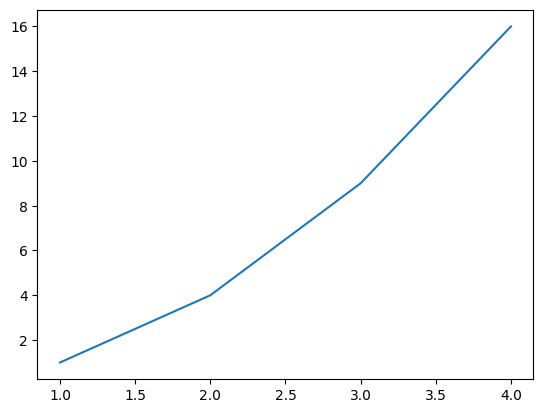

In [180]:
# log plots

import matplotlib.pyplot as plt

with mlflow.start_run(run_name = 'loging_plots') as run:
    fig, ax = plt.subplots()
    ax.plot([1, 2, 3, 4], [1, 4, 9, 16])
    mlflow.log_figure(fig, 'figure.png')

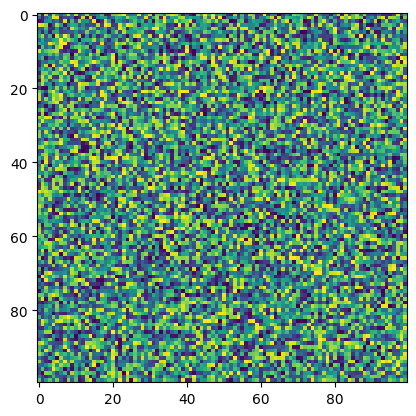

In [182]:
# login images (create a noise image using numpy and matplotlib)

import numpy as np
import matplotlib.pyplot as plt

with mlflow.start_run(run_name = 'loging_images') as run:
    fig, ax = plt.subplots()
    ax.imshow(np.random.rand(100, 100))    
    mlflow.log_figure(fig, 'figure.png')

# model signature
* how inputs and outputs look like
* in this example we will use column based signature

In [205]:
# log model with signature signature with sepal data

from sklearn.datasets import load_iris
from mlflow.models import ModelSignature
from mlflow.types import Schema, ColSpec

iris = load_iris(as_frame=True)

# schema for feature columns
col_specifications = [
    ColSpec(type = "double", name = feature_name, required = True) for feature_name in iris.feature_names
]

model_input = Schema(inputs = col_specifications)

model_output = Schema(inputs = [ColSpec(type = "integer", name = "species", required = True)])


In [206]:
display(model_input.to_dict())
display(model_output.to_dict())

[{'type': 'double', 'name': 'sepal length (cm)', 'required': True},
 {'type': 'double', 'name': 'sepal width (cm)', 'required': True},
 {'type': 'double', 'name': 'petal length (cm)', 'required': True},
 {'type': 'double', 'name': 'petal width (cm)', 'required': True}]

[{'type': 'integer', 'name': 'species', 'required': True}]

In [207]:
model_signature = ModelSignature(inputs = model_input, outputs = model_output)

from pprint import pprint
pprint(model_signature.to_dict(), indent=2)
# its ok params:None

{ 'inputs': '[{"type": "double", "name": "sepal length (cm)", "required": '
            'true}, {"type": "double", "name": "sepal width (cm)", "required": '
            'true}, {"type": "double", "name": "petal length (cm)", '
            '"required": true}, {"type": "double", "name": "petal width (cm)", '
            '"required": true}]',
  'outputs': '[{"type": "integer", "name": "species", "required": true}]',
  'params': None}


In [208]:
# train and log the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(iris.data, iris.target)

with mlflow.start_run(run_name = 'log_model_signatures') as run:
    mlflow.sklearn.log_model(
        rfc,
        'rfc',
        signature=model_signature
    )

2026/01/07 20:19:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


# load a model

In [212]:
print('run id:', run.info.run_id)
my_model = mlflow.sklearn.load_model('runs:/' + run.info.run_id + '/rfc')

run id: 3632d4335e1948c0a43e66ca3d6aaa59


In [215]:
type(my_model).__name__

'RandomForestClassifier'

In [217]:
my_model.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# signature enforcement (flavors of mlflow can be with sklearn or python)

In [224]:
model_uri = 'runs:/3632d4335e1948c0a43e66ca3d6aaa59/rfc'

sk_model = mlflow.sklearn.load_model(model_uri = model_uri)
print(type(sk_model).__name__)

pyfunc_model = mlflow.pyfunc.load_model(model_uri = model_uri) # now its a python model
print(type(pyfunc_model).__name__)

RandomForestClassifier


PyFuncModel


In [225]:
# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

x_invalid = x.copy()
# sepal length as int
x_invalid['sepal length (cm)'] = x_invalid['sepal length (cm)'].astype(int)
x_invalid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    int64  
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [226]:
sk_model.predict(x_invalid) # it will work ok

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [228]:
try:
    pyfunc_model.predict(x_invalid) # it will raise an error
except Exception as e:
    print(e)

Failed to enforce schema of data '     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                    5               3.5                1.4               0.2
1                    4               3.0                1.4               0.2
2                    4               3.2                1.3               0.2
3                    4               3.1                1.5               0.2
4                    5               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                  6               3.0                5.2               2.3
146                  6               2.5                5.0               1.9
147                  6               3.0                5.2               2.0
148                  6               3.4                5.4               2.3
149                  5               3.0                5.1               1.8

[150 rows x 4 columns]' with 

In [230]:
# add invalid name
x_invalid = x.copy()
x_invalid['sepal length (cm) invalid'] = x_invalid['sepal length (cm)']
x_invalid.drop(columns = ['sepal length (cm)'], inplace = True)

try:
    sk_model.predict(x_invalid)
except Exception as e:
    print(e)

The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sepal length (cm) invalid
Feature names seen at fit time, yet now missing:
- sepal length (cm)



In [231]:
try:
    pyfunc_model.predict(x_invalid)
except Exception as e:
    print(e)

Failed to enforce schema of data '     sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 3.5                1.4               0.2   
1                 3.0                1.4               0.2   
2                 3.2                1.3               0.2   
3                 3.1                1.5               0.2   
4                 3.6                1.4               0.2   
..                ...                ...               ...   
145               3.0                5.2               2.3   
146               2.5                5.0               1.9   
147               3.0                5.2               2.0   
148               3.4                5.4               2.3   
149               3.0                5.1               1.8   

     sepal length (cm) invalid  
0                          5.1  
1                          4.9  
2                          4.7  
3                          4.6  
4                          5.0  
..                     

# signature with optional columns

In [4]:
# create a modelo signature with iris data set and an optional input

from sklearn.datasets import load_iris
from mlflow.models import ModelSignature
from mlflow.types import Schema, ColSpec

iris = load_iris(as_frame=True)

# schema for feature columns
col_specifications = [
    ColSpec(type = "double", name = feature_name, required = True) for feature_name in iris.feature_names
]

# optional column
col_specifications_optional = [
    ColSpec(type = "double", name = feature_name, required = False) for feature_name in iris.feature_names
]

model_input = Schema(inputs = col_specifications + col_specifications_optional)
model_output = Schema(inputs = [ColSpec(type = "integer", name = "species", required = True)])

model_signature = ModelSignature(inputs = model_input, outputs = model_output)

from pprint import pprint
pprint(model_signature.to_dict(), indent=2)


# train and log the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(iris.data, iris.target)

with mlflow.start_run(run_name = 'log_enforced_signature_optional_column') as run:
    mlflow.sklearn.log_model(
        rfc,
        'rfc',
        signature=model_signature
    )



2026/01/11 01:31:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


{ 'inputs': '[{"type": "double", "name": "sepal length (cm)", "required": '
            'true}, {"type": "double", "name": "sepal width (cm)", "required": '
            'true}, {"type": "double", "name": "petal length (cm)", '
            '"required": true}, {"type": "double", "name": "petal width (cm)", '
            '"required": true}, {"type": "double", "name": "sepal length '
            '(cm)", "required": false}, {"type": "double", "name": "sepal '
            'width (cm)", "required": false}, {"type": "double", "name": '
            '"petal length (cm)", "required": false}, {"type": "double", '
            '"name": "petal width (cm)", "required": false}]',
  'outputs': '[{"type": "integer", "name": "species", "required": true}]',
  'params': None}


In [10]:
# log model with pyfunc and predict

model_uri = 'runs:/c1ff1da9f79c461e9aa16ec67fbbf510/rfc'

pyfunc_model = mlflow.pyfunc.load_model(model_uri = model_uri) # now its a python model
print(type(pyfunc_model).__name__)

# predict over iris dataset

x = iris.data
y = iris.target

x_invalid = x.copy()
# sepal length as int
x_invalid['optional column'] = x_invalid['sepal length (cm)'] * 10
x_invalid.info()

try:
    predictions = pyfunc_model.predict(x_invalid)
except Exception as e:
    print(e)

print('predictions:', predictions)

2026/01/11 01:35:40 WARNING mlflow.models.utils: Found extra inputs in the model input that are not defined in the model signature: `['optional column']`. These inputs will be ignored.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   optional column    150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
# try the same but droping a required column

x_invalid = x.copy()
x_invalid.drop(columns = ['sepal length (cm)'], inplace = True)

try:
    predictions = pyfunc_model.predict(x_invalid)
except Exception as e:
    print(e)

Failed to enforce schema of data '     sepal width (cm)  petal length (cm)  petal width (cm)
0                 3.5                1.4               0.2
1                 3.0                1.4               0.2
2                 3.2                1.3               0.2
3                 3.1                1.5               0.2
4                 3.6                1.4               0.2
..                ...                ...               ...
145               3.0                5.2               2.3
146               2.5                5.0               1.9
147               3.0                5.2               2.0
148               3.4                5.4               2.3
149               3.0                5.1               1.8

[150 rows x 3 columns]' with schema '['sepal length (cm)': double (required), 'sepal width (cm)': double (required), 'petal length (cm)': double (required), 'petal width (cm)': double (required), 'sepal length (cm)': double (optional), 'sepal width (cm)': d

# infer model signature (None for non required columns)

In [18]:
x = iris.data
y = iris.target
y.name = 'species'

x_optional_column = x.copy()
x_optional_column['optional_column'] = None
x_optional_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   optional_column    0 non-null      object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# infer model signature
from mlflow.models.signature import infer_signature

model_signature = infer_signature(x_optional_column, y)
pprint(model_signature.to_dict(), indent=2)

{ 'inputs': '[{"type": "double", "name": "sepal length (cm)", "required": '
            'true}, {"type": "double", "name": "sepal width (cm)", "required": '
            'true}, {"type": "double", "name": "petal length (cm)", '
            '"required": true}, {"type": "double", "name": "petal width (cm)", '
            '"required": true}, {"type": "any", "name": "optional_column", '
            '"required": false}]',
  'outputs': '[{"type": "long", "name": "species", "required": true}]',
  'params': None}


In [24]:
# train and log the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(iris.data, iris.target)

with mlflow.start_run(run_name = 'log_model') as run:
    mlflow.sklearn.log_model(
        rfc,
        'rfc',
        signature=model_signature
    )


2026/01/11 22:28:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


# python flavor

In [28]:
def predict_with_pandas(input_list):
    import pandas as pd
    df = pd.DataFrame({'input_column' : input_list})
    df['output_column'] = df['input_column'] * 10
    return df['output_column']

# log model
with mlflow.start_run() as run:
    mlflow.pyfunc.log_model(
        artifact_path = 'model',
        python_model = predict_with_pandas,
        pip_requirements=['pandas']
    )

2026/01/11 22:39:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/pyfunc/__init__.py:3190: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:155: FutureWarning: Model's `predict` method contains invalid parameters: {'input_list'}. Only the following parameter names are allowed: context, model_input, and params. Note that invalid parameters will no longer be permitted in future versions.
  param_names = _check_func_signature(func, "predict")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py